# Quiz 6

BEFORE YOU START THIS QUIZ:

1. Click on "Copy to Drive" to make a copy of the quiz,

2. Click on "Share",
    
3. Click on "Change" and select "Anyone with this link can edit"
    
4. Click "Copy link" and

5. Paste the link into [this Canvas assignment](https://canvas.olin.edu/courses/313/assignments/5138). 

This quiz is open notes, open internet. 

* You can ask for help from the instructor, but not from anyone else.

* You can use code you find on the internet, but if you use more than a couple of lines from a single source, you should attribute the source.



## A tree of sequences

Suppose you have a large number of DNA sequences, represented using strings containing the characters `A`, `C`, `G`, and `T`, which are the bases that make up DNA.

One way to store these sequences is in a tree where each node has four children, one for each base.
Here's a class definition for such a node.

In [38]:
class Node:
    def __init__(self):
        self.children = [None, None, None, None]
        self.end = False
        
    def __repr__(self):
        return f'Node({self.end}, {self.children})'

The instance variables are:

* `children`, which is a list of four `Node` objects, where `None` indicates that a child is missing.

* `end`: which is a `bool` that indicates whether this `Node` represents the end of a sequence.
 
I'll use the following dictionary to map from each base to its index in the list of children.

In [39]:
index_map = dict(A=0, C=1, G=2, T=3)
index_map

{'A': 0, 'C': 1, 'G': 2, 'T': 3}

The following function inserts a new sequence into the tree.

In [40]:
def insert(root, sequence):
    node = root
    for base in sequence:
        i = index_map[base]
        if node.children[i] is None:
            node.children[i] = Node()
        node = node.children[i]
    node.end = True

As an example, here's a tree that contains only one sequence, `CA`.

In [41]:
node = Node()
insert(node, 'CA')
node

Node(False, [None, Node(False, [Node(True, [None, None, None, None]), None, None, None]), None, None])

The root of the tree has a single child, at index `1`.

In [42]:
child = node.children[1]
child

Node(False, [Node(True, [None, None, None, None]), None, None, None])

The child has a single child, at index `0`.

In [43]:
grandchild = child.children[0]
grandchild

Node(True, [None, None, None, None])

In the grandchild, `end` is `True`, which indicates that there is a sequence in the tree that ends at this node.

Here's an example with more sequences.

In [44]:
tree = Node()
for sequence in ['ACGT', 'ACAT', 'CAT', 'CATATTAC']:
    insert(tree, sequence)

I'll use NetworkX and EoN to draw this tree. 

In [45]:
try:
    import EoN
except ImportError:
    !pip install EoN

In [46]:
import networkx as nx

def add_edges(parent, G):
    """Traverse the tree and add edges to G."""
    for child in parent.children:
        if child:
            G.add_edge(parent, child)
            add_edges(child, G)

In [47]:
G = nx.DiGraph()
add_edges(tree, G)

In [48]:
def get_labels(parent, labels):
    """Traverse the tree and add node labels to a dictionary."""
    if parent.end:
        labels[parent] = '*'
    else:
        labels[parent] = ''
        
    for child in parent.children:
        if child:
            get_labels(child, labels)

In [49]:
def get_edge_labels(parent, edge_labels):
    """Traverse the tree and add edge labels to a dictionary."""
    bases = 'ACGT'
    for i, child in enumerate(parent.children):
        if child:
            edge_labels[parent, child] = bases[i]
            get_edge_labels(child, edge_labels)

In [50]:
from EoN import hierarchy_pos

def draw_tree(tree):
    G = nx.DiGraph()
    add_edges(tree, G)
    pos = hierarchy_pos(G)
    labels = {}
    get_labels(tree, labels)
    edge_labels = {}
    get_edge_labels(tree, edge_labels)
    nx.draw(G, pos, labels=labels, alpha=0.4)
    nx.draw_networkx_edge_labels(G, pos, 
                                 edge_labels=edge_labels, 
                                 font_color='C1')

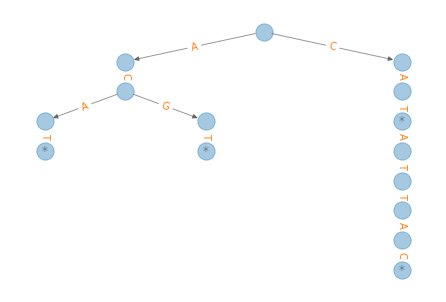

In [51]:
draw_tree(tree)

## Question 1

Write a function called `find` that takes as parameters

* A `Node` that represents the root of a tree and 

* A string representing a sequence of bases.

It should return `True` if the sequence appears in the tree, and `False` otherwise.

In [52]:
# Solution

def find(root, sequence):
    node = root
    for base in sequence:
        i = index_map[base]
        if node.children[i]:
            node = node.children[i]
        else:
            return False
    return node.end

You can use the following examples to test your code:

In [53]:
find(tree, 'CAT')  # should be True

True

In [54]:
find(tree, 'ACAT') # should be True

True

In [55]:
find(tree, 'TAG') # should be False

False

In [56]:
find(tree, 'CA') # should be False

False

## Question 2

Write a function called `find_all_rec` that takes as parameters:

* A `Node` in a tree.

* A path that indicates the sequence of bases from the root to the current `Node`.

* A list of sequences.

This function should traverse the tree and add to the list all of the complete sequences it discovers.

Hint: Review `make_table` from `huffman.ipynb`.

In [57]:
# Solution

def find_all_rec(node, path, table):
    if node.end:
        table.append(path)
        
    bases = 'ACGT'
    for i, child in enumerate(node.children):
        if child:
            find_all_rec(child, path+bases[i], table)

You can use the following example to test your code.

In [58]:
t = []
find_all_rec(tree, '', t)
t

['ACAT', 'ACGT', 'CAT', 'CATATTAC']

The result should be a list with the following elements, not necessarily in this order

```
['ACAT', 'ACGT', 'CAT', 'CATATTAC']
```


## Question 3

Write a function called `find_all` that takes a `Node` and a sequence of bases. It should traverse the tree and return a list that contains all sequences in the tree that begin with the given prefix.

Note: You can use `find_all_rec` as part of your solution even if your answer to the previous question does not work.

In [60]:
# Solution

def find_all(root, prefix):
    node = root
    for base in prefix:
        i = index_map[base]
        if node.children[i]:
            node = node.children[i]
        else:
            return []
        
    t = []
    find_all_rec(node, prefix, t)
    return t

You can use the following examples to test your code.

In [61]:
find_all(tree, 'CA')   # Should return ['CAT', 'CATATTAC']

['CAT', 'CATATTAC']

In [62]:
find_all(tree, 'A')    # Should return ['ACAT', 'ACGT']

['ACAT', 'ACGT']

In [63]:
find_all(tree, '')     # Should return all sequences in the tree

['ACAT', 'ACGT', 'CAT', 'CATATTAC']

## Question 4

Suppose we write a more general version of `Node.__init__` that takes `end` and `children` as optional parameters.

In [64]:
class BadNode:
    def __init__(self, end=True, children=[None, None, None, None]):
        self.children = children
        self.end = end
        
    def __repr__(self):
        return f'Node({self.end}, {self.children})'

And we write a version of `insert` that uses `BadNode`:

In [65]:
def bad_insert(root, sequence):
    node = root
    for base in sequence:
        i = index_map[base]
        if node.children[i] is None:
            node.children[i] = BadNode(end=False)
        node = node.children[i]
    node.end = True

If we use the new versions to make a tree, like this:

In [66]:
tree2 = BadNode()
for sequence in ['ACGT', 'ACAT', 'CAT', 'CATATTAC']:
    bad_insert(tree2, sequence)

It seems to work. But if we draw the tree, we get a `RecursionError`.

In [67]:
draw_tree(tree2)

RecursionError: maximum recursion depth exceeded while calling a Python object

In the cell that defines `BadNode`, write a comment that explains what the problem is, and then fix it.

Note: Your fixed version should still accept `end` and `children` as optional parameters.

*Data Structures and Information Retrieval in Python*

Copyright 2021 Allen Downey

License: [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-nc-sa/4.0/)